In [21]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pickle
import pandas as pd
import geopandas as gpd


import warnings
warnings.filterwarnings('ignore')


graph_filepath = "../data/iowa.graphml"
towns_cleaned_filepath = "../data/towns_cleaned.pkl"
states_shp_filepath = "../data/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp"
states_map = gpd.read_file(states_shp_filepath)
iowa_map = states_map[states_map.name == 'Iowa']

past_routes = pd.read_csv('../data/past_routes.csv', index_col=0)
route_columns = ['Start', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'End']

with open(towns_cleaned_filepath, "rb") as f:
    towns = pickle.load(f)

In [22]:
# Melt the DataFrame to long format
past_routes_long = pd.melt(
    past_routes,
    id_vars=['Year'],
    value_vars=route_columns,
    var_name='Day',
    value_name='Town'
)

# Merge the DataFrames
merged_df = pd.merge(
    past_routes_long,
    towns[['name', 'centroid', 'lon', 'lat']],
    left_on='Town',
    right_on='name',
    how='left'
)

# Drop rows where the centroid is missing (town not found in towns_unique)
merged_df = merged_df.dropna(subset=['centroid'])

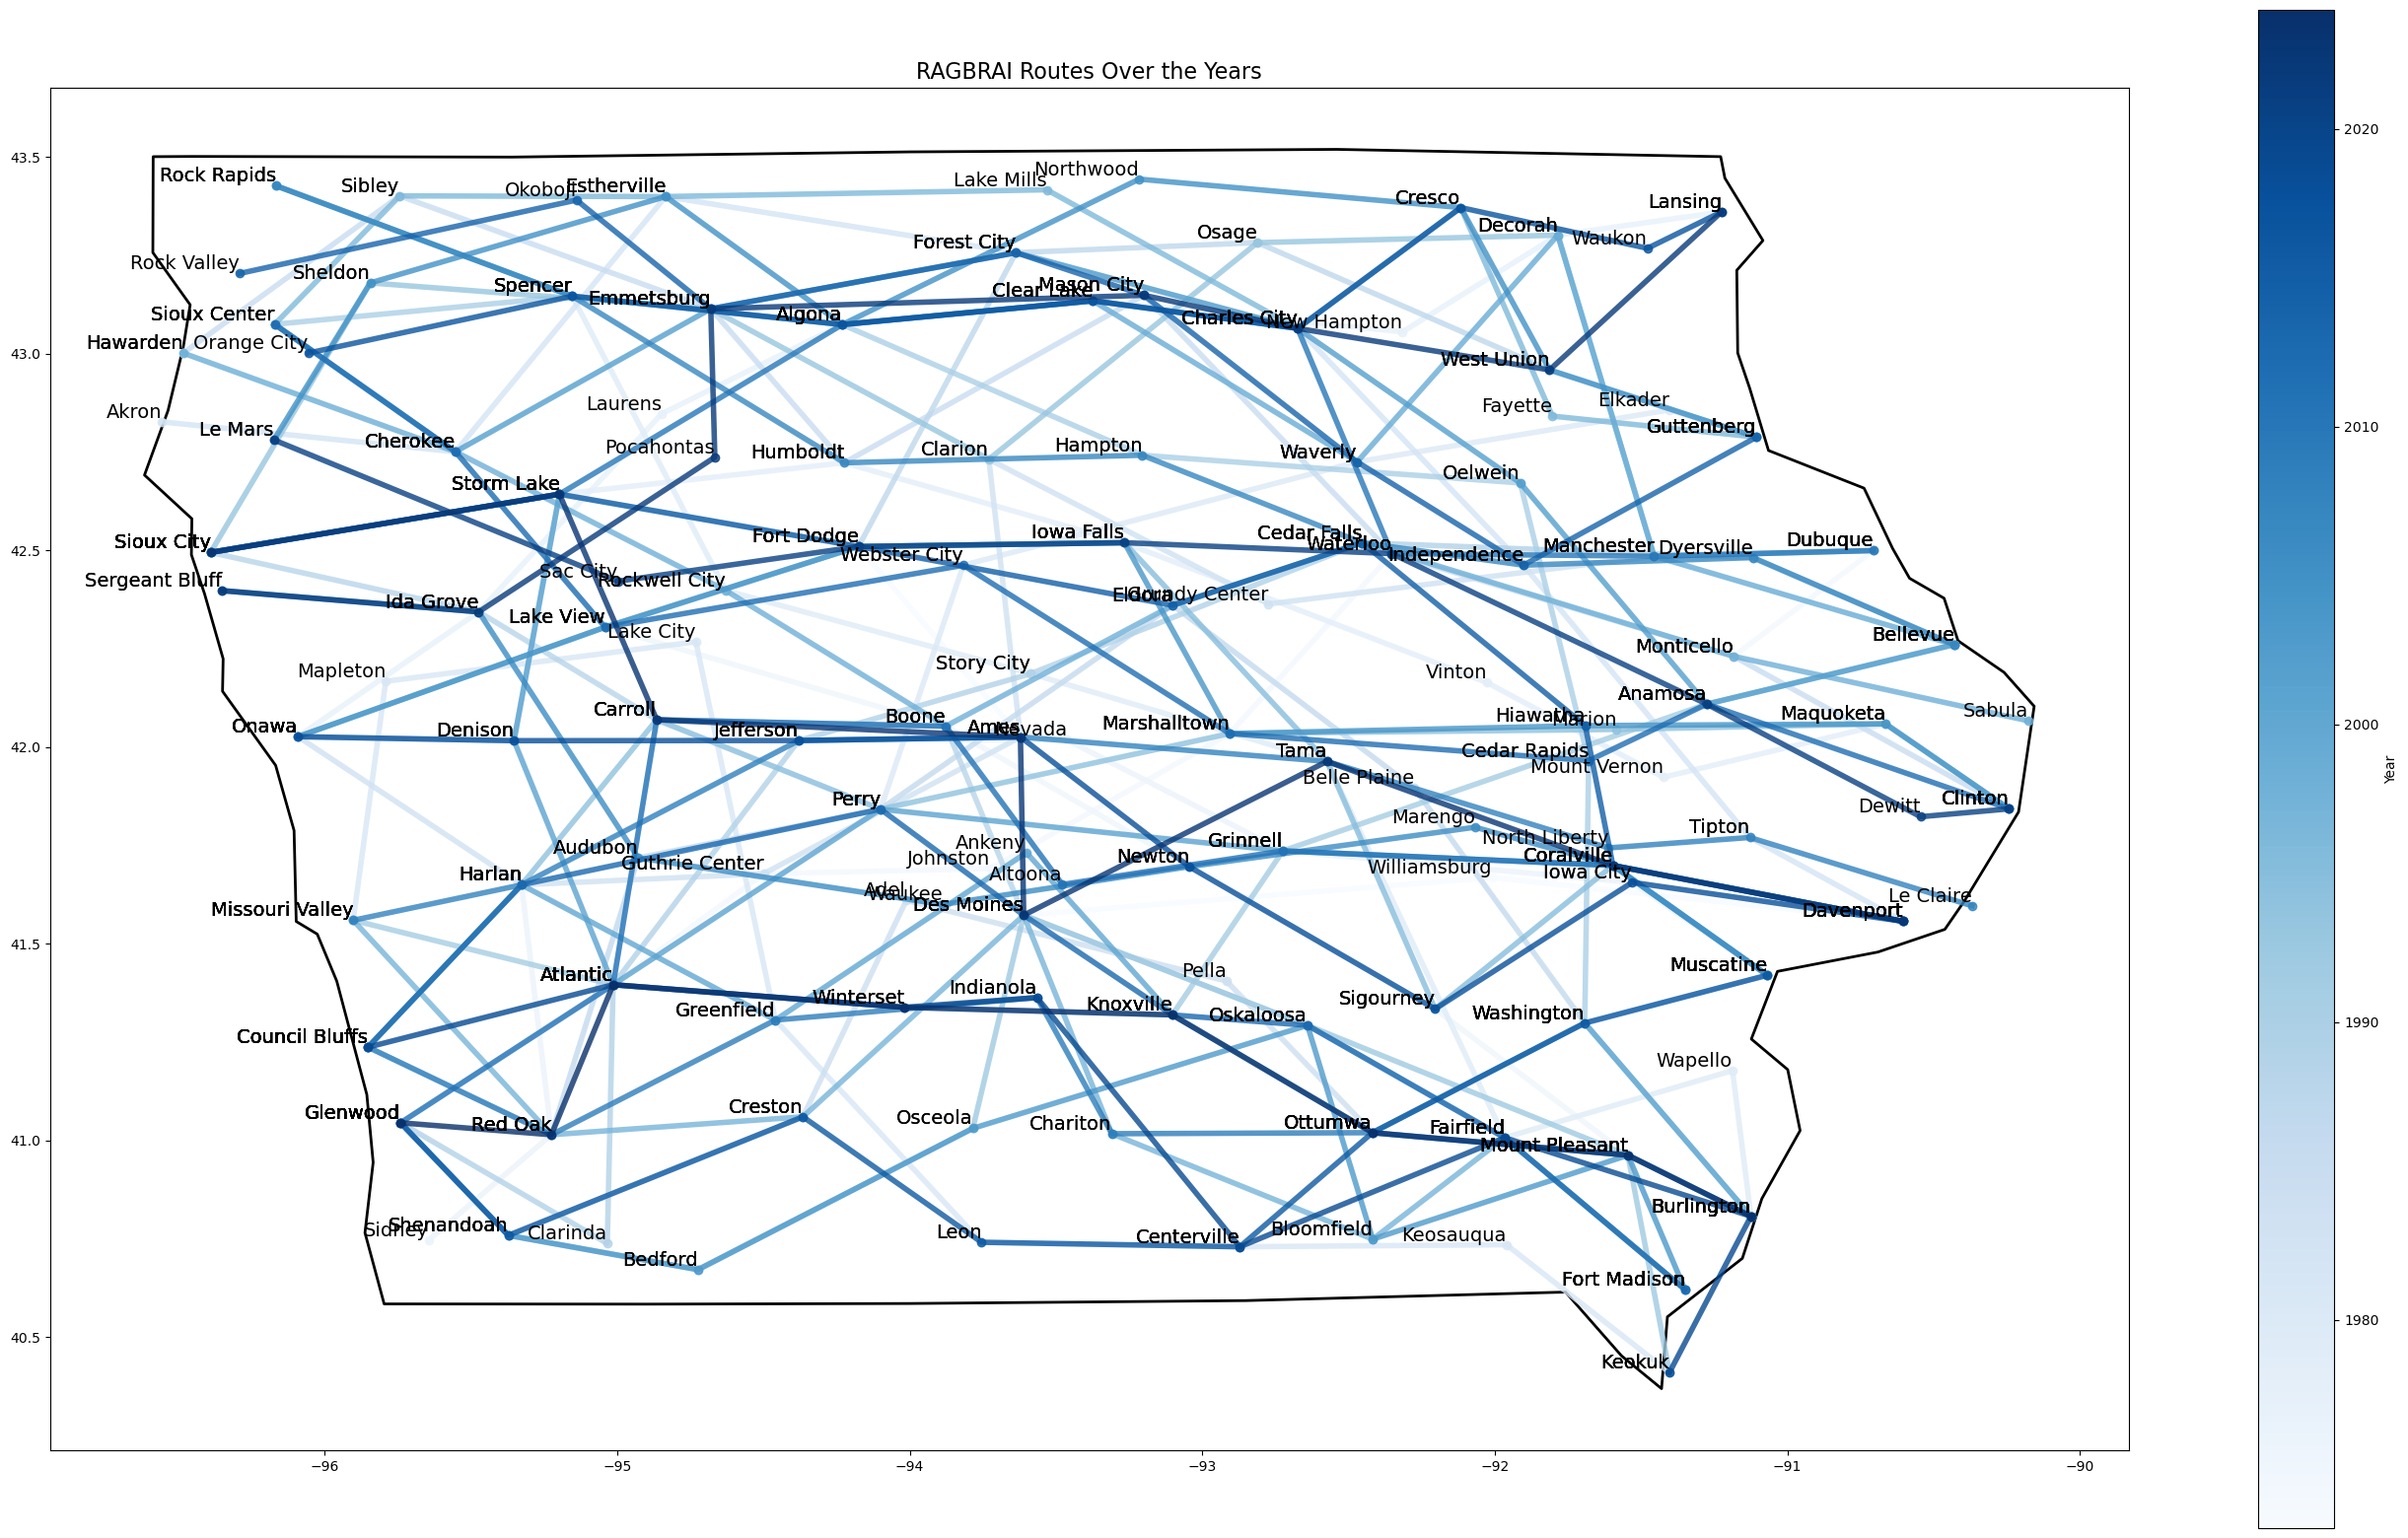

In [24]:
fig, ax = plt.subplots(figsize=(34, 20))
iowa_map.plot(ax=ax, color='none', edgecolor='black', linewidth=2, label='Iowa State Border')

# Define a colormap ranging from grey to blue
years = merged_df['Year'].unique()
norm = mcolors.Normalize(vmin=min(years), vmax=max(years))  # Normalize years to the colormap range
cmap = cm.ScalarMappable(norm=norm, cmap='Blues')

for year in years:
    year_data = merged_df[merged_df['Year'] == year]
    # Sort by Day to maintain the route order
    year_data['Day'] = pd.Categorical(year_data['Day'], categories=route_columns, ordered=True)
    year_data = year_data.sort_values('Day')
    
    # Map the year to the colormap
    color = cmap.to_rgba(year)
    
    # Plot the route
    ax.plot(year_data['lon'], year_data['lat'], marker='o', label=f"Year {year}", color=color, alpha=.8, linewidth=4)
    
    # Annotate the towns
    for x, y, label in zip(year_data['lon'], year_data['lat'], year_data['Town'].str.title()):
        ax.text(x, y, label, fontsize=14, ha='right', va='bottom')

plt.title("RAGBRAI Routes Over the Years", fontsize=16)
# Add a colorbar to show the year gradient
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Blues'), ax=ax)
cbar.set_label('Year')

plt.show()


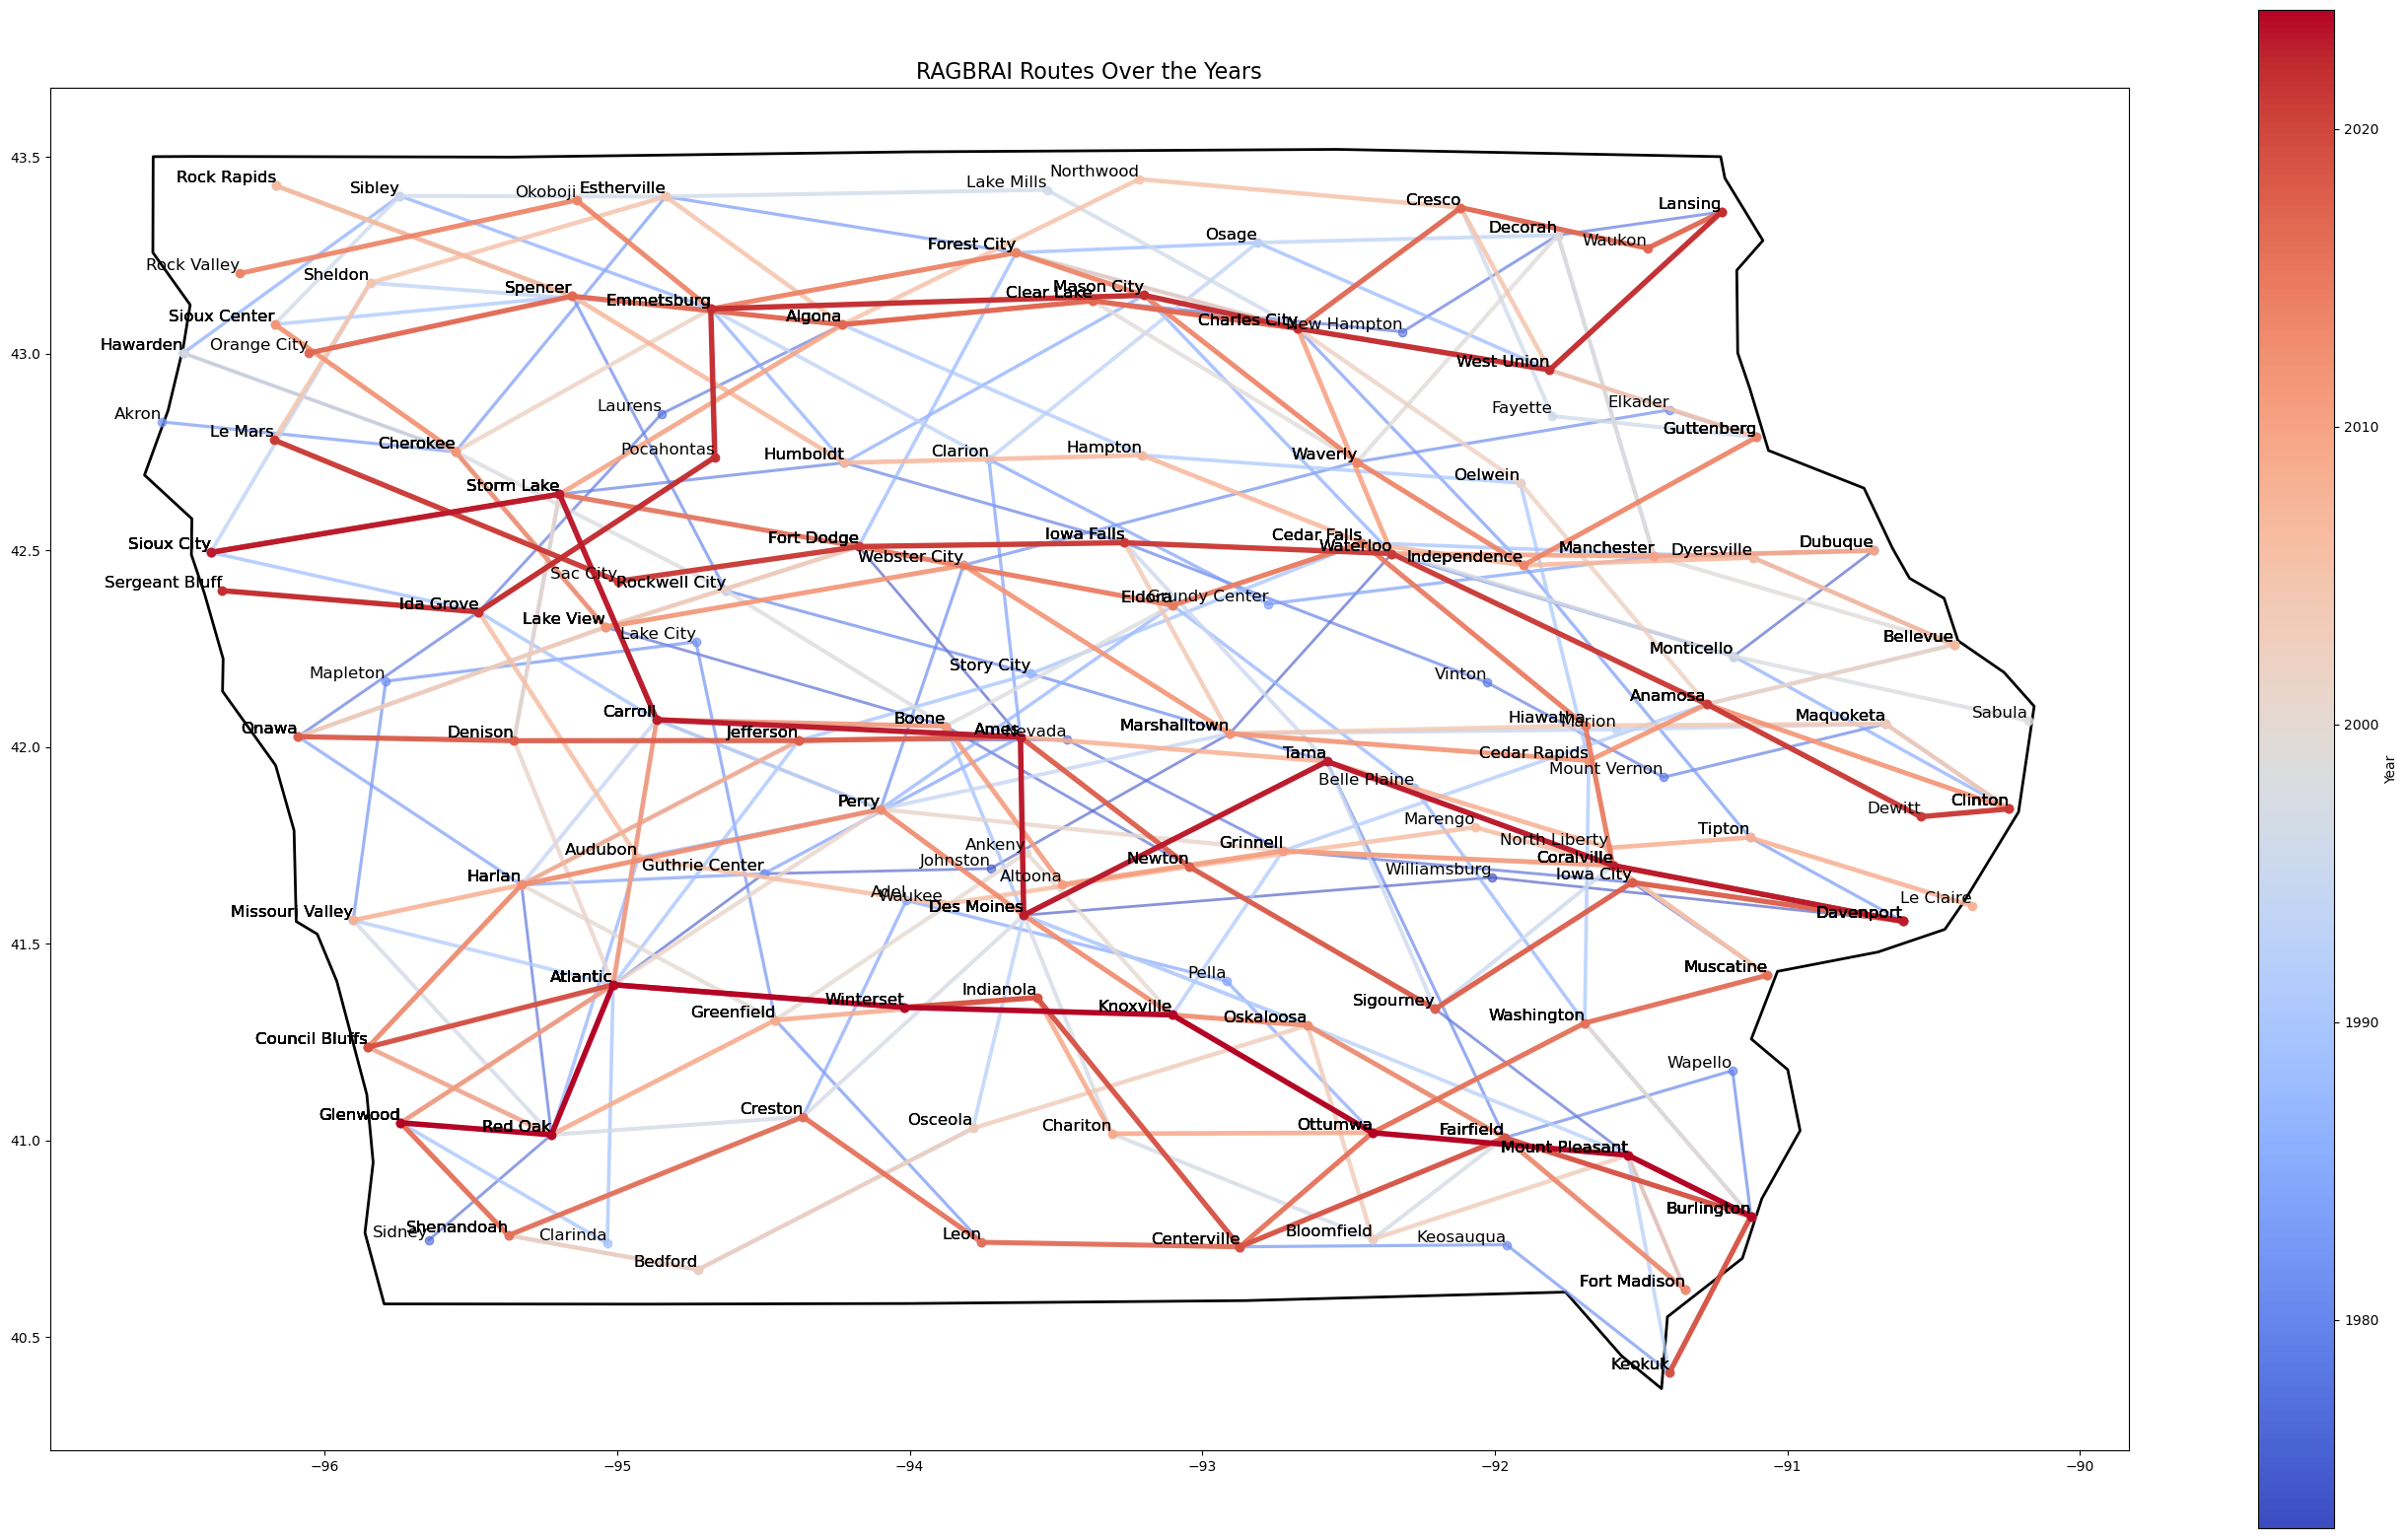

In [25]:
# Plot the Iowa map
fig, ax = plt.subplots(figsize=(34, 20))
iowa_map.plot(ax=ax, color='none', edgecolor='black', linewidth=2, label='Iowa State Border')

# Define a colormap and normalization
cmap = cm.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=min(years), vmax=max(years))

# Scale for line width and alpha
line_widths = (merged_df['Year'] - min(years)) / (max(years) - min(years)) * 3 + 1
alpha_values = (merged_df['Year'] - min(years)) / (max(years) - min(years)) * 0.5 + 0.5

for year in years:
    year_data = merged_df[merged_df['Year'] == year]
    year_data['Day'] = pd.Categorical(year_data['Day'], categories=route_columns, ordered=True)
    year_data = year_data.sort_values('Day')

    # Map year to color, line width, and alpha
    color = cmap(norm(year))
    line_width = 2 + (year - min(years)) / (max(years) - min(years)) * 2
    alpha = 0.6 + (year - min(years)) / (max(years) - min(years)) * 0.4

    ax.plot(year_data['lon'], year_data['lat'], marker='o', color=color, alpha=alpha, linewidth=line_width, label=f"{year}")

    # Town Annotations
    for x, y, label in zip(year_data['lon'], year_data['lat'], year_data['Town'].str.title()):
        ax.text(x, y, label, fontsize=12, ha='right', va='bottom')

# Colorbar
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Year')
plt.title("RAGBRAI Routes Over the Years", fontsize=16)
plt.show()

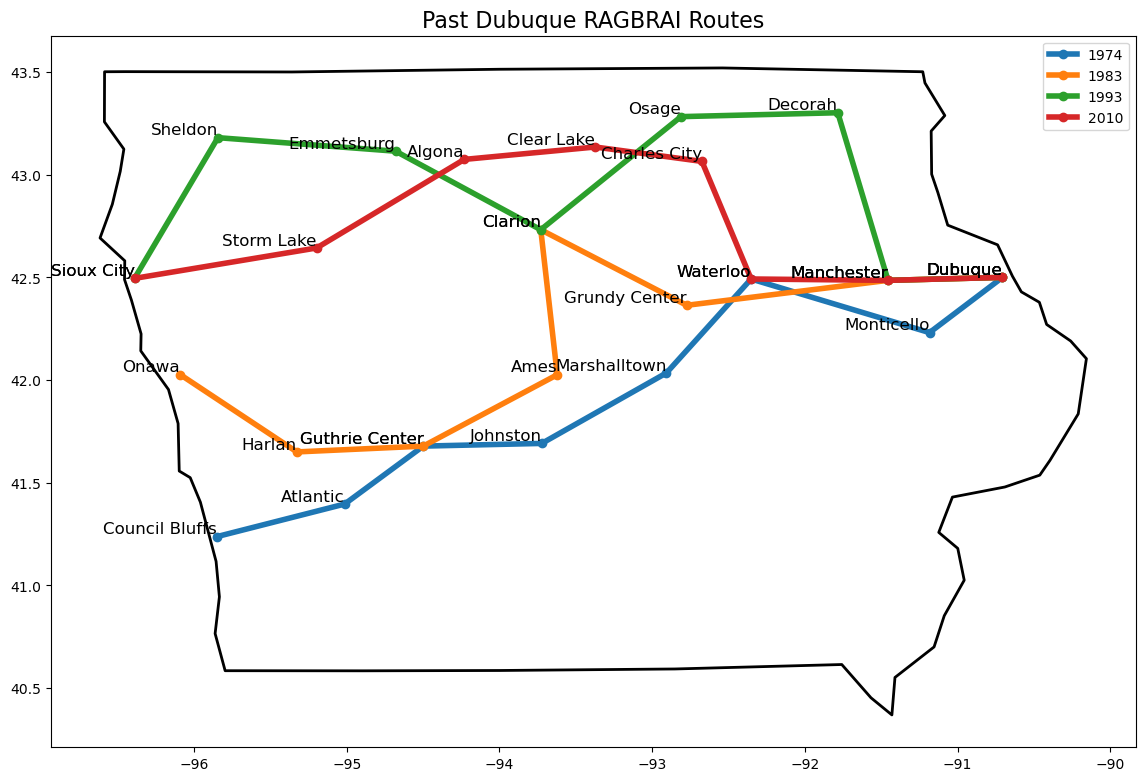

In [32]:
# Plot the Iowa map
fig, ax = plt.subplots(figsize=(14, 10))
iowa_map.plot(ax=ax, color='none', edgecolor='black', linewidth=2, label='Iowa State Border')

for year in years:
    year_data = merged_df[merged_df['Year'] == year]

    if 'Dubuque' in year_data['Town'].str.title().to_list():
        year_data['Day'] = pd.Categorical(year_data['Day'], categories=route_columns, ordered=True)
        year_data = year_data.sort_values('Day')
        ax.plot(year_data['lon'], year_data['lat'], marker='o', linewidth=4, label=f"{year}")

        # Town Annotations
        for x, y, label in zip(year_data['lon'], year_data['lat'], year_data['Town'].str.title()):
            ax.text(x, y, label, fontsize=12, ha='right', va='bottom')

plt.legend()
plt.title("Past Dubuque RAGBRAI Routes", fontsize=16)
plt.show()

In [9]:
merged_df

,Year,#,Miles,Feet of Climb,Riders,Day,Town,name,centroid,lon,lat
0,1973,I,412,"12,637",130,Start,sioux city,sioux city,POINT (-96.38977 42.49488),-96.389771,42.494882
1,1974,II,422,"12,648","2,000",Start,council bluffs,council bluffs,POINT (-95.85158 41.23686),-95.851575,41.236861
2,1975,III,450,"12,573","3,000",Start,hawarden,hawarden,POINT (-96.48321 43.00176),-96.483206,43.001759
3,1976,IV,430,"13,737","4,000",Start,sidney,sidney,POINT (-95.64432 40.74625),-95.644317,40.746255
4,1977,V,400,"8,479","6,000",Start,onawa,onawa,POINT (-96.09099 42.02642),-96.090985,42.026424
...,...,...,...,...,...,...,...,...,...,...,...
402,2019,XLVII,427,"15,011","10,000",End,keokuk,keokuk,POINT (-91.40325 40.40967),-91.403250,40.409673
403,2021,XLVIII,454,"11,500","10,000",End,clinton,clinton,POINT (-90.24237 41.84290),-90.242366,41.842899
404,2022,XLIX,454,"11,954","10,000",End,lansing,lansing,POINT (-91.22547 43.36066),-91.225469,43.360658
405,2023,L,500,"16,549","20,000",End,davenport,davenport,POINT (-90.60544 41.55695),-90.605436,41.556945
